In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
Verizon_data = 'Telco_Churn_Data.csv'

df = pd.read_csv(Verizon_data)

df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


# Data Exploration


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#see statistics for all columns
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7042,7040,7042,7041,...,7041,7041,7040,7043,7041,7042,7041,7042.000000,7042,7042
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,4,2,4,NaN,6530,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6360,3388,3095,3498,...,3094,3472,2808,2785,3870,4170,2364,NaN,11,5173
mean,NaN,NaN,0.162147,NaN,NaN,32.683516,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.756774,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,28.998589,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.089352,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,-50.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Since most of the dtypes are objects we will need to do some work before we can compute the basic statistics.


**Adress missing values**

---


In [6]:
#check for missing values
df.isnull().values.any()

True

In [7]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        1
MultipleLines       3
InternetService     1
OnlineSecurity      2
OnlineBackup        0
DeviceProtection    2
TechSupport         2
StreamingTV         3
StreamingMovies     0
Contract            2
PaperlessBilling    1
PaymentMethod       2
MonthlyCharges      1
TotalCharges        1
Churn               1
dtype: int64

In [8]:
#find indices of rows that have missing values
bool_df = df.isnull()
row_has_nan = bool_df.any(axis=1)
rows_with_nan = df[row_has_nan].index
rows_with_nan

Int64Index([1375, 1397, 1401, 1411, 1417, 3995, 4666, 4668, 4670, 6239], dtype='int64')

In [9]:
#since most missing values are not numeric values but rather yes or no questions
#and there are not so many of them, we can just drop them
df = df.drop(df.index[rows_with_nan])

In [10]:
np.sum(df.isnull(), axis = 0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Feature transformations**

In [11]:
df.shape

(7033, 21)

In [12]:
# If we one hot encode the entire dataframe then we get over 10000 columns
pd.get_dummies(df).shape

(7033, 13601)

In [13]:
# Instead we will make different transformations like grouping etc

In [14]:
# Male 1 and Female 0
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df = df.rename(columns={'gender': 'isMale'})

In [15]:
# Group some values to prepare them for transformations
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 'No'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 'No'})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 'No'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 'No'})
df['InternetService'] = df['InternetService'].replace({'DSL': 'Yes', 'Fiber optic' : 'Yes'})


In [16]:
#for payment method, we only care whether it was automatic or not
df['PaymentMethod'] = df['PaymentMethod'].replace({'Bank transfer (automatic)': 'Yes', 'Credit card (automatic)' : 'Yes', 'Electronic check' : 'No', 'Mailed check' : 'No'})
df = df.rename(columns={'PaymentMethod': 'AutomaticPayment'})

In [17]:
# change "Yes" to 1 and "No" to 0
df['Partner'] = df['Partner'].replace({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].replace({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 1, 'No': 0})
df['InternetService'] = df['InternetService'].replace({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df['AutomaticPayment'] = df['AutomaticPayment'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [18]:
#check data types
df.dtypes

customerID           object
isMale                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
AutomaticPayment      int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [19]:
#see how many unique values there are for "Contact"
unique_values = df['Contract'].unique()
value_counts = df['Contract'].value_counts()

print(unique_values, value_counts)

['Month-to-month' 'One year' 'Two year' '1'] Month-to-month    3864
Two year          1693
One year          1472
1                    4
Name: Contract, dtype: int64


In [20]:
#Group 1 and "One year" together
df['Contract'] = df['Contract'].replace({"1": "One year"})

In [21]:
unique_values = df['Contract'].unique()
value_counts = df['Contract'].value_counts()

print(unique_values, value_counts)

['Month-to-month' 'One year' 'Two year'] Month-to-month    3864
Two year          1693
One year          1476
Name: Contract, dtype: int64


In [22]:
#Now, let's hot-encode them
df = pd.get_dummies(df, columns=['Contract'])
df.shape

(7033, 23)

In [23]:
#We don't need the customer ID values for the ML model, so let's drop it
df = df.drop(columns=['customerID'])
df

,isMale,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,AutomaticPayment,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,0,29.85,29.85,0,1,0,0
1,1,0,0,0,34,1,0,1,1,0,...,0,0,0,0,56.95,1889.5,0,0,1,0
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,0,53.85,108.15,1,1,0,0
3,1,0,0,0,45,0,0,1,1,0,...,0,0,0,1,42.30,1840.75,0,0,1,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,0,70.70,151.65,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,1,1,1,0,84.80,1990.5,0,0,1,0
7039,0,0,1,1,72,1,1,1,0,1,...,1,1,1,1,103.20,7362.9,0,0,1,0
7040,0,0,1,1,11,0,0,1,1,0,...,0,0,1,0,29.60,346.45,0,1,0,0
7041,1,1,1,0,4,1,1,1,0,0,...,0,0,1,0,74.40,306.6,1,1,0,0


In [24]:
df.dtypes

isMale                       int64
SeniorCitizen                int64
Partner                      int64
Dependents                   int64
tenure                       int64
PhoneService                 int64
MultipleLines                int64
InternetService              int64
OnlineSecurity               int64
OnlineBackup                 int64
DeviceProtection             int64
TechSupport                  int64
StreamingTV                  int64
StreamingMovies              int64
PaperlessBilling             int64
AutomaticPayment             int64
MonthlyCharges             float64
TotalCharges                object
Churn                        int64
Contract_Month-to-month      uint8
Contract_One year            uint8
Contract_Two year            uint8
dtype: object

In [25]:
#Let's exlore the "MontlyCharges" values

In [26]:
maximum_MC = df['MonthlyCharges'].max()
minimum_MC = df['MonthlyCharges'].min()
data_range_MC = maximum_MC - minimum_MC
average_MC = df['MonthlyCharges'].mean()
std_deviation_MC = df['MonthlyCharges'].std()

print(f"Maximum: {maximum_MC}")
print(f"Minimum: {minimum_MC}")
print(f"Range: {data_range_MC}")
print(f"Average: {average_MC}")
print(f"Standard Deviation: {std_deviation_MC}")

Maximum: 118.75
Minimum: 18.25
Range: 100.5
Average: 64.76227072373098
Standard Deviation: 30.089196044052716


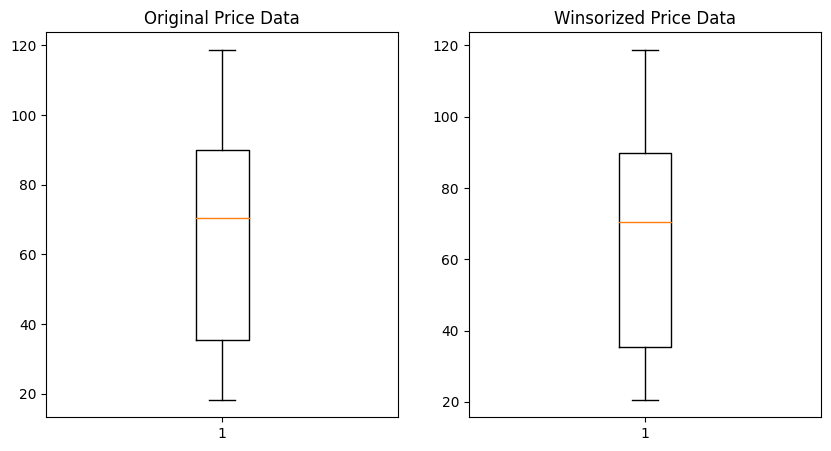

Original Price Data Summary Statistics:
 count    7033.000000
mean       64.762271
std        30.089196
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Winsorized Price Data Summary Statistics:
 count    7033.000000
mean       64.874662
std        29.921695
min        20.600000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: winsorized_MonthlyCharges, dtype: float64


In [28]:
lower_percentile = 15
upper_percentile = 100

# Calculating the threshold values
lower_threshold = np.percentile(df['MonthlyCharges'], lower_percentile)
upper_threshold = np.percentile(df['MonthlyCharges'], upper_percentile)

# Winsorizing the data
df['winsorized_MonthlyCharges'] = np.clip(df['MonthlyCharges'], lower_threshold, upper_threshold)

# Comparing summary statistics
original_stats_MC = df['MonthlyCharges'].describe()
winsorized_stats_MC = df['winsorized_MonthlyCharges'].describe()

# Creating box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['MonthlyCharges'])
plt.title('Original Price Data')
plt.subplot(1, 2, 2)
plt.boxplot(df['winsorized_MonthlyCharges'])
plt.title('Winsorized Price Data')
plt.show()

print("Original Price Data Summary Statistics:\n", original_stats_MC)
print("\nWinsorized Price Data Summary Statistics:\n", winsorized_stats_MC)
